## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Importing Dataset 

In [2]:
fraud = pd.read_csv('Fraud_check.csv')
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


### Insights of data

In [3]:
fraud.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [4]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


## EDA

In [5]:
fraud.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

<AxesSubplot:>

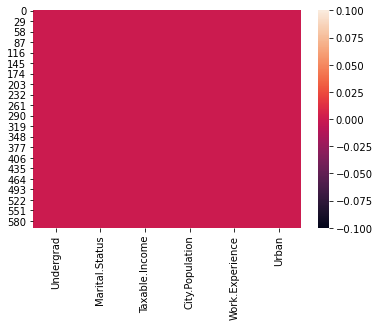

In [6]:
sns.heatmap(fraud.isnull())

* No null value found.

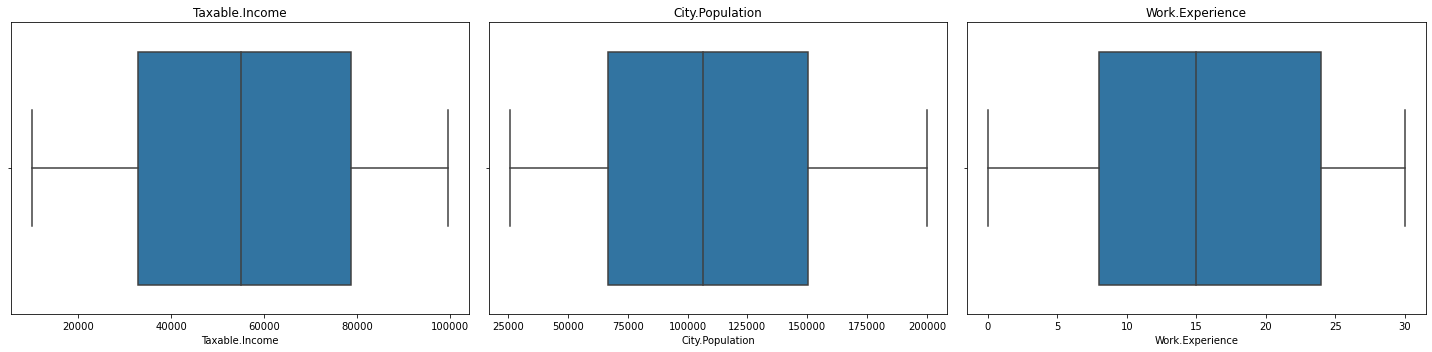

In [7]:
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
sns.boxplot(x='Taxable.Income', data = fraud)
plt.title('Taxable.Income')

plt.subplot(1,3,2)
sns.boxplot(x='City.Population', data = fraud)
plt.title('City.Population')

plt.subplot(1,3,3)
sns.boxplot(x='Work.Experience', data = fraud)
plt.title('Work.Experience')

plt.tight_layout()

* No outliers found in the data. 

### Adding new column 'income' as per problem statement

In [8]:
fraud['income']='<=30000'
fraud.head(15)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,income
0,NO,Single,68833,50047,10,YES,<=30000
1,YES,Divorced,33700,134075,18,YES,<=30000
2,NO,Married,36925,160205,30,YES,<=30000
3,YES,Single,50190,193264,15,YES,<=30000
4,NO,Married,81002,27533,28,NO,<=30000
5,NO,Divorced,33329,116382,0,NO,<=30000
6,NO,Divorced,83357,80890,8,YES,<=30000
7,YES,Single,62774,131253,3,YES,<=30000
8,NO,Single,83519,102481,12,YES,<=30000
9,YES,Divorced,98152,155482,4,YES,<=30000


### Converting the Taxable income variable to bucketing

In [9]:
fraud.loc[fraud['Taxable.Income']>30000, 'income']='Good'
fraud.loc[fraud['Taxable.Income']<=30000, 'income'] = 'Risky'

In [10]:
fraud.head(40)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,income
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
5,NO,Divorced,33329,116382,0,NO,Good
6,NO,Divorced,83357,80890,8,YES,Good
7,YES,Single,62774,131253,3,YES,Good
8,NO,Single,83519,102481,12,YES,Good
9,YES,Divorced,98152,155482,4,YES,Good


### Droping the Taxable income variable 

In [11]:
fraud.drop(['Taxable.Income'],axis=1, inplace=True)
fraud

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,income
0,NO,Single,50047,10,YES,Good
1,YES,Divorced,134075,18,YES,Good
2,NO,Married,160205,30,YES,Good
3,YES,Single,193264,15,YES,Good
4,NO,Married,27533,28,NO,Good
...,...,...,...,...,...,...
595,YES,Divorced,39492,7,YES,Good
596,YES,Divorced,55369,2,YES,Good
597,NO,Divorced,154058,0,YES,Good
598,YES,Married,180083,17,NO,Good


In [12]:
fraud['income'].value_counts()

Good     476
Risky    124
Name: income, dtype: int64

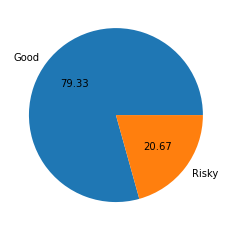

In [13]:
plt.pie(fraud['income'].value_counts(),autopct='%0.2f', labels=['Good', 'Risky'], data= fraud)
plt.show()

#### Model.fit doesnt not consider String. So, we encode 

In [14]:
label_en = LabelEncoder()
for i in range(0, fraud.shape[1]):
    if fraud.dtypes[i] == 'object':
        fraud[fraud.columns[i]] = label_en.fit_transform(fraud[fraud.columns[i]])
        
fraud.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,income
0,0,2,50047,10,1,0
1,1,0,134075,18,1,0
2,0,1,160205,30,1,0
3,1,2,193264,15,1,0
4,0,1,27533,28,0,0


### Splitting Dataset into features & labels

In [15]:
x = fraud.iloc[:,0:-1]
y = fraud['income']

In [16]:
x

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [17]:
y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: income, Length: 600, dtype: int32

### Splitting data into training and testing data set 

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x , y , test_size=0.3, random_state=40, stratify=y)
print('x_train shape : ' , x_train.shape)
print('y_train shape : ' , y_train.shape)
print(y_train.value_counts())

x_train shape :  (420, 5)
y_train shape :  (420,)
0    333
1     87
Name: income, dtype: int64


* Data is imbalaced.

## Building model with imbalanced data

In [19]:
model = DecisionTreeClassifier(random_state=40)
criterion = ['entropy', 'gini']
max_depth = range(1,10)
params = [{'criterion': criterion , 'max_depth':max_depth}]
grid = GridSearchCV(estimator=model, param_grid=params, cv = 10)
grid.fit(x_train, y_train)
print(grid.best_params_)
print(grid.best_score_)

{'criterion': 'entropy', 'max_depth': 1}
0.7904761904761904


#### Fitting Model

In [20]:
model_1= DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=40)
model_1.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=40)

#### Model evaluation on trained data 

In [21]:
y_train_pred_1 = model_1.predict(x_train)
accuracy_train_1 = accuracy_score(y_train, y_train_pred_1) 
print('Accuracy score for trained data: ', round(accuracy_train_1, 4))

Accuracy score for trained data:  0.7929


In [22]:
confusion_matrix(y_train, y_train_pred_1)

array([[333,   0],
       [ 87,   0]], dtype=int64)

In [23]:
print(classification_report(y_train, y_train_pred_1))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88       333
           1       0.00      0.00      0.00        87

    accuracy                           0.79       420
   macro avg       0.40      0.50      0.44       420
weighted avg       0.63      0.79      0.70       420



In [24]:
y_test_pred_1= model_1.predict(x_test)
accuracy_test_1 = accuracy_score(y_test, y_test_pred_1)
print('Accuracy Score of Test data :', round(accuracy_test_1, 4))

Accuracy Score of Test data : 0.7944


In [25]:
confusion_matrix(y_test, y_test_pred_1)

array([[143,   0],
       [ 37,   0]], dtype=int64)

In [26]:
print(classification_report(y_test, y_test_pred_1))

              precision    recall  f1-score   support

           0       0.79      1.00      0.89       143
           1       0.00      0.00      0.00        37

    accuracy                           0.79       180
   macro avg       0.40      0.50      0.44       180
weighted avg       0.63      0.79      0.70       180



* 79% accuracy and 0% recall on the test data. That’s a huge difference!
* Model prediction is highly biased.
* So to handle the imabalanced data, will be using SMOTE technique.

## Handling imbalanced trained data using SMOTE

In [27]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 40)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train)

In [28]:
print('x_train after resampling shape : ' , x_train_res.shape)
print('y_train after resampling shape : ' , y_train_res.shape)
print(y_train_res.value_counts())

x_train after resampling shape :  (666, 5)
y_train after resampling shape :  (666,)
0    333
1    333
Name: income, dtype: int64


In [29]:
print(y_test.value_counts())

0    143
1     37
Name: income, dtype: int64


## Building Decision Tree Classifier Model with balanced train data

In [30]:
model = DecisionTreeClassifier(random_state=40)
criterion = ['entropy', 'gini']
max_depth = range(1,10)
params = [{'criterion': criterion , 'max_depth':max_depth}]
grid = GridSearchCV(estimator=model, param_grid=params, cv = 10)
grid.fit(x_train_res, y_train_res)
print(grid.best_params_)
print(grid.best_score_)

{'criterion': 'gini', 'max_depth': 9}
0.689280868385346


In [31]:
model_final= DecisionTreeClassifier(criterion='gini', max_depth=9, random_state=40)
model_final.fit(x_train_res, y_train_res)

DecisionTreeClassifier(max_depth=9, random_state=40)

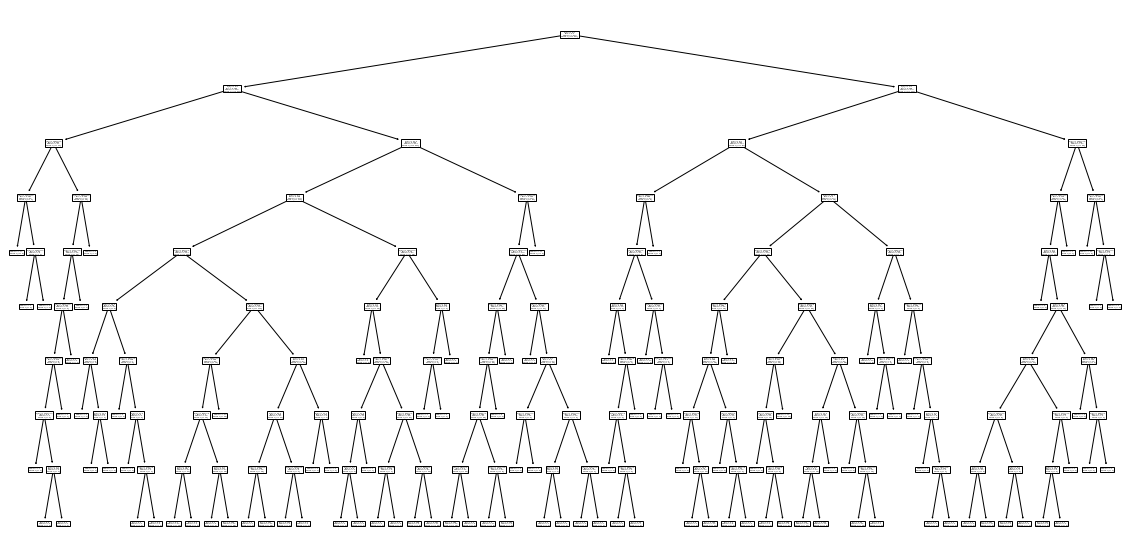

In [32]:
plt.figure(figsize=(20,10))
tree.plot_tree(model_final);

### Model Evaluation on trained data

In [33]:
y_train_pred = model_final.predict(x_train_res)
accuracy_train = accuracy_score(y_train_res, y_train_pred) 
print('Accuracy score for trained data: ', round(accuracy_train, 4))

Accuracy score for trained data:  0.8799


In [34]:
confusion_matrix(y_train_res, y_train_pred)

array([[283,  50],
       [ 30, 303]], dtype=int64)

In [35]:
print(classification_report(y_train_res, y_train_pred))

              precision    recall  f1-score   support

           0       0.90      0.85      0.88       333
           1       0.86      0.91      0.88       333

    accuracy                           0.88       666
   macro avg       0.88      0.88      0.88       666
weighted avg       0.88      0.88      0.88       666



### Predicting model on test data 

In [36]:
y_test_pred= model_final.predict(x_test)
accuracy_test = accuracy_score(y_test, y_test_pred)
print('Accuracy Score of Test data :', round(accuracy_test, 4))

Accuracy Score of Test data : 0.5444


In [37]:
confusion_matrix(y_test, y_test_pred)

array([[82, 61],
       [21, 16]], dtype=int64)

In [38]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.80      0.57      0.67       143
           1       0.21      0.43      0.28        37

    accuracy                           0.54       180
   macro avg       0.50      0.50      0.47       180
weighted avg       0.68      0.54      0.59       180



## Conclusion:

* This final model(built after handling imbalanced data) is better than the first model(built with imbalanced data) because it classifies better and also the recall value of minority class is 43 %. But due to undersampling of majority class, its recall has decreased to 57 %. So in this case, SMOTE is giving me a great accuracy and recall, I’ll go ahead and use that model!